
# Project: Investigate a Dataset - [No-show appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> ** This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

### Question(s) for Analysis
>  1- Is there more than one influencing factor, but in different proportions?
 
       2- What is the most influencing factor on the patient’s attendance for the examination on time?  

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling



In [3]:
# Load  data 
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [4]:
#Display  5 rows from data
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
# A tuple dimensions of the dataframe rows and columns
df.shape

(110527, 14)

* The data consists of (110,527 rows ) and (14 columns)

In [7]:
# Types of data in columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

* Very useful when making comparisons

In [8]:
# Summery about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* There are no missing values in this data.

In [9]:
#There are duplicate in data
sum(df.duplicated())

0

* There are no duplicated in this data

In [10]:
# Number of unique data in colunm
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

* Number of patients without duplication (62,299 patients).
* There are patients who have booked more than one appointment for the examination.
* Diversity of age for patients.
* Diversity of Geographical for patients.

In [11]:
# Statictic about data 
df.describe().round(2)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.00,110527.00,110527.0,110527.0,110527.00,110527.00,110527.00,110527.00
mean,1.474963e+14,5675305.12,37.09,0.1,0.2,0.07,0.03,0.02,0.32
std,2.560949e+14,71295.75,23.11,0.3,0.4,0.26,0.17,0.16,0.47
min,3.921784e+04,5030230.00,-1.00,0.0,0.0,0.00,0.00,0.00,0.00
25%,4.172614e+12,5640285.50,18.00,0.0,0.0,0.00,0.00,0.00,0.00
50%,3.173184e+13,5680573.00,37.00,0.0,0.0,0.00,0.00,0.00,0.00
75%,9.439172e+13,5725523.50,55.00,0.0,0.0,0.00,0.00,0.00,1.00
max,9.999816e+14,5790484.00,115.00,1.0,1.0,1.00,1.00,4.00,1.00


* Age statistics are very important in analyzing this data, unlike the rest of the columns
* Minimum age (-1), which means there are error values in the data of age.Logically, there is no negative age.

In [12]:
# Showing the wrong data in column of age
df[df['Age'] == -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


There is only one row with wrong age data and it will not be effective in analyzing the data and can be excluded


### Data Cleaning
> 

In [13]:
#Correct columns name
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


* We corrected the columns name from (Hipertension , No-show) to (Hypertension , No_show)

In [14]:
# Exclusion the wrong data in column of age
df_new = df[df['Age'] != -1]
df_new

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


* The wrong data has already been excluded

In [15]:
# Statictic about new data 
df_new.describe().round(2)

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,110526.00,110526.00,110526.0,110526.0,110526.00,110526.00,110526.00,110526.00
mean,1.474934e+14,5675304.22,37.09,0.1,0.2,0.07,0.03,0.02,0.32
std,2.560943e+14,71295.44,23.11,0.3,0.4,0.26,0.17,0.16,0.47
min,3.921784e+04,5030230.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
25%,4.172536e+12,5640285.25,18.00,0.0,0.0,0.00,0.00,0.00,0.00
50%,3.173184e+13,5680572.00,37.00,0.0,0.0,0.00,0.00,0.00,0.00
75%,9.438963e+13,5725522.75,55.00,0.0,0.0,0.00,0.00,0.00,1.00
max,9.999816e+14,5790484.00,115.00,1.0,1.0,1.00,1.00,4.00,1.00


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Is there more than one influencing factor, but in different proportions?)

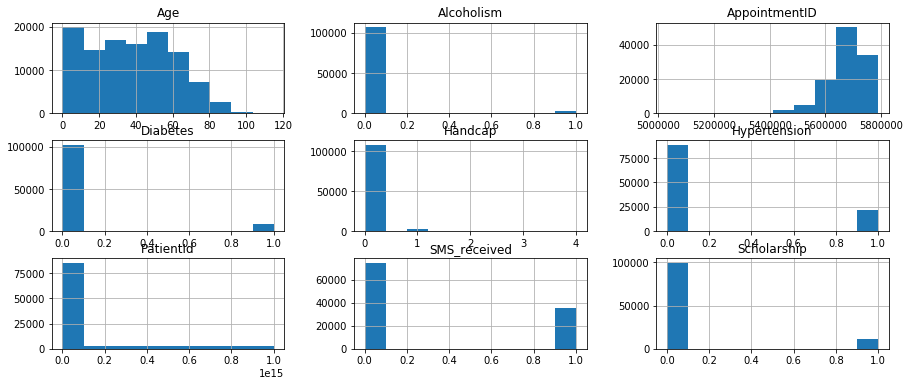

In [38]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_new.hist(figsize= (15,6));

* Great variety of ages
* There are very few patients who use alcohol
* There are very few patients who have Diabetes
* There are very few patients who have Handcap
* Patients with Hypertension are close to a quarter
* Patients who received SMS are close to a half
* There are few patients who have Scholarship

### Research Question 2  (What is the most influencing factor on the patient’s attendance for the examination on time? )

In [17]:
# Rename items in a column (No_show) 
attend  = df_new.No_show == 'No'
noattend  = df_new.No_show == 'Yes'

In [18]:
# Total booking
df_new.count()

PatientId         110526
AppointmentID     110526
Gender            110526
ScheduledDay      110526
AppointmentDay    110526
Age               110526
Neighbourhood     110526
Scholarship       110526
Hypertension      110526
Diabetes          110526
Alcoholism        110526
Handcap           110526
SMS_received      110526
No_show           110526
dtype: int64

In [19]:
# Number of people who attended
df_new[attend ].count()

PatientId         88207
AppointmentID     88207
Gender            88207
ScheduledDay      88207
AppointmentDay    88207
Age               88207
Neighbourhood     88207
Scholarship       88207
Hypertension      88207
Diabetes          88207
Alcoholism        88207
Handcap           88207
SMS_received      88207
No_show           88207
dtype: int64

In [20]:
# Percentage of those who attend from total booking
per_attend =((df_new[attend ].count()/df_new.count())*100).round(2)
per_attend 

PatientId         79.81
AppointmentID     79.81
Gender            79.81
ScheduledDay      79.81
AppointmentDay    79.81
Age               79.81
Neighbourhood     79.81
Scholarship       79.81
Hypertension      79.81
Diabetes          79.81
Alcoholism        79.81
Handcap           79.81
SMS_received      79.81
No_show           79.81
dtype: float64

In [21]:
# Number of those who did not attend
df_new[noattend].count()

PatientId         22319
AppointmentID     22319
Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hypertension      22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMS_received      22319
No_show           22319
dtype: int64

In [22]:
# Percentage of those who did not attend from total booking
per_noattend =((df_new[noattend].count()/df_new.count())*100).round(2)
per_noattend 

PatientId         20.19
AppointmentID     20.19
Gender            20.19
ScheduledDay      20.19
AppointmentDay    20.19
Age               20.19
Neighbourhood     20.19
Scholarship       20.19
Hypertension      20.19
Diabetes          20.19
Alcoholism        20.19
Handcap           20.19
SMS_received      20.19
No_show           20.19
dtype: float64

* Number of booking (110,526).
* Number of people who attended (88,207) percentage (79.81%) from total booking.
* Number of those who did not attend (22,319) percentage (20.19%) from total booking.

In [62]:
def myHistplot(df_new,xvar):
    
    #number of categories
    ncat=len(df_new[xvar].unique())
    
    #set plot dimensions
    plt.figure(figsize=[15,5])
    
    #plot
    df_new[xvar][attend].hist(alpha=0.5, color='red', label='attend', bins=ncat+2,align='left')
    df_new[xvar][noattend].hist(alpha=0.5, color='yellow', label='noattend', bins=ncat+2,align='right')
    
    #title labels
    plt.legend(loc='upper right')
    plt.xlabel(f'{xvar}')
    plt.ylabel('patients')
    plt.title(f'Relastionship between {xvar} and No_show');
    plt.grid(False);

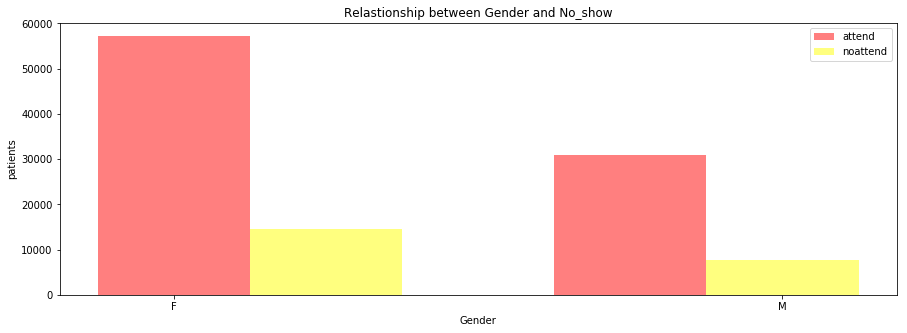

In [63]:
# Relastionship between Gender and No_show
myHistplot(df_new,'Gender')

In [25]:
# Percentage of men or females who attend or did not attend from total booking
df_new.groupby('Gender')['No_show'].value_counts(normalize=True).unstack('Gender')

Gender,F,M
No_show,,
No,0.796851,0.800321
Yes,0.203149,0.199679


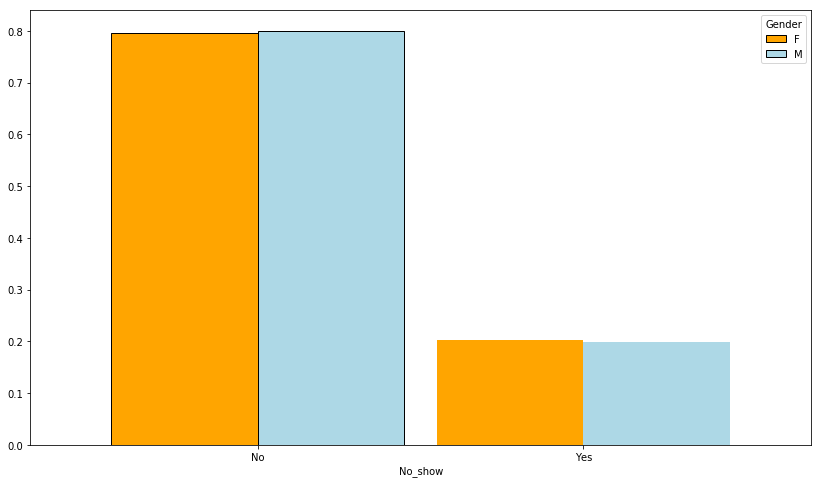

In [26]:
df_new.groupby('Gender')['No_show'].value_counts(normalize=True).unstack('Gender').plot.bar(edgecolor='black',
                                                                                            figsize=[14,8],
                                                                                            rot=0,
                                                                                            width=0.9,
                                                                                            color=['orange','lightblue']);

The difference is very small between the percentage of non-attendance of men and women, and therefore the Gender is not effective in attendance from non-attendance

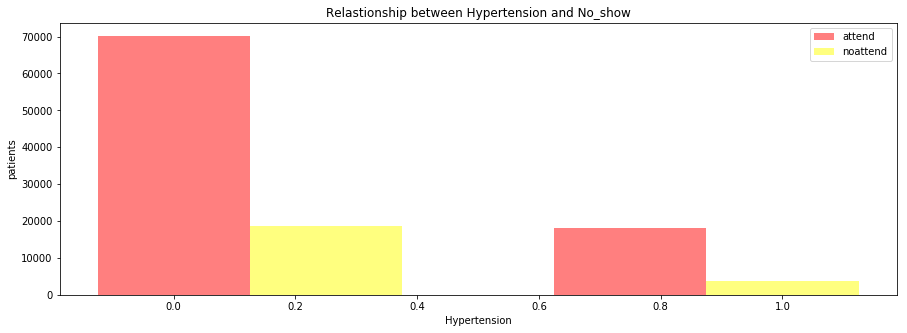

In [64]:
# Relastionship between Hypertension and No_show
myHistplot(df_new,'Hypertension')

In [31]:
# Percentage of patients who had Hypertension or not and  attended or not from total booking
df_new.groupby('Hypertension')['No_show'].value_counts(normalize=True).unstack('Hypertension')

Hypertension,0,1
No_show,,
No,0.790961,0.82698
Yes,0.209039,0.17302


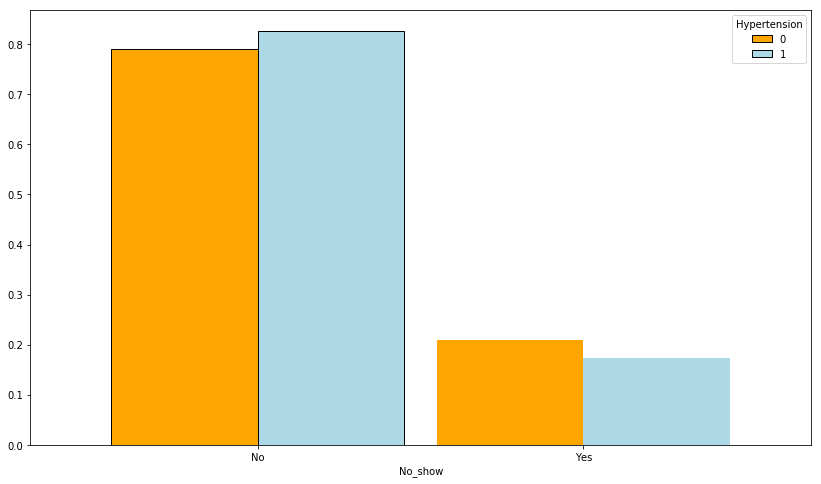

In [30]:
df_new.groupby('Hypertension')['No_show'].value_counts(normalize=True).unstack('Hypertension').plot.bar(edgecolor='black',
                                                                                            figsize=[14,8],
                                                                                            rot=0,
                                                                                            width=0.9,
                                                                                            color=['orange','lightblue']);

* The difference between the percentage of non-attendance with patients who have Hypertension and those who have not is small, and therefore Hypertension is not effective in attendance from non-attendance.

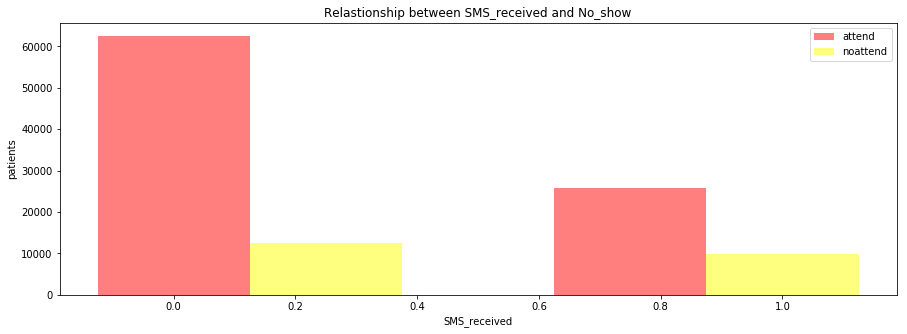

In [65]:
# Relastionship between SMS_received and No_show
myHistplot(df_new,'SMS_received')

In [33]:
# Percentage of patients who had received SMS or not and attended or not from total booking
df_new.groupby('SMS_received')['No_show'].value_counts(normalize=True).unstack('SMS_received')

SMS_received,0,1
No_show,,
No,0.832965,0.724255
Yes,0.167035,0.275745


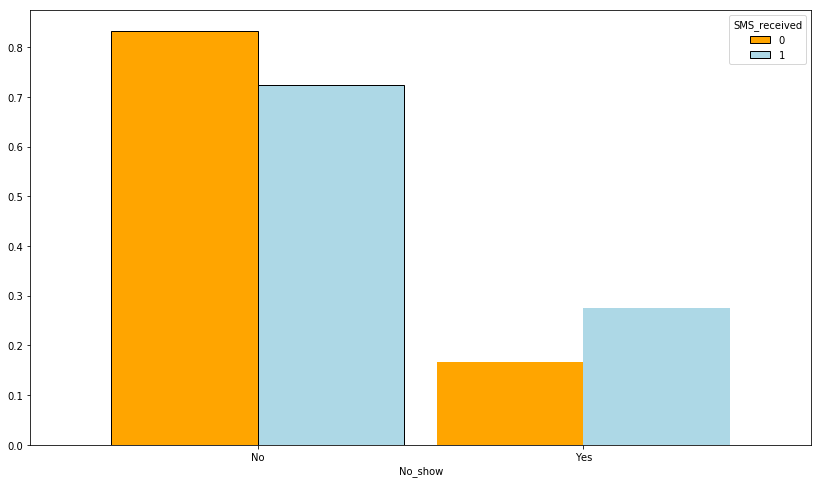

In [34]:
df_new.groupby('SMS_received')['No_show'].value_counts(normalize=True).unstack('SMS_received').plot.bar(edgecolor='black',
                                                                                            figsize=[14,8],
                                                                                            rot=0,
                                                                                            width=0.9,
                                                                                            color=['orange','lightblue']);

Patients who received SMS and did not attend are greater than those who did not receive SMS and did not attend. It gives an indication of weak SMS service and does not achieve what is required

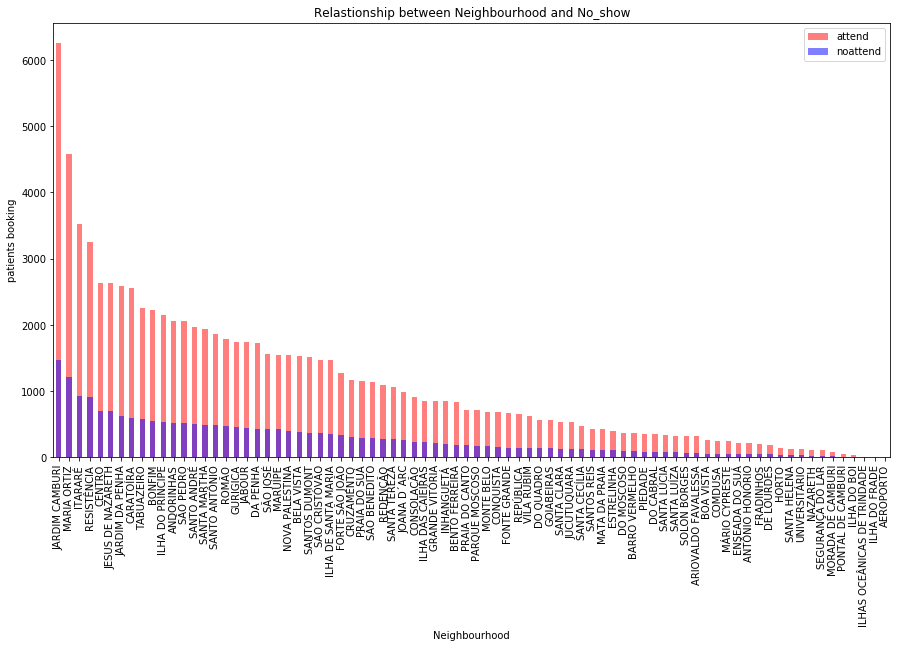

In [68]:
# Relastionship between Neighbourhood and No_show
plt.figure(figsize=[15, 8])
df_new.Neighbourhood[attend].value_counts().plot(kind='bar', alpha = 0.5, color='red', label = 'attend')
df_new.Neighbourhood[noattend].value_counts().plot(kind='bar', alpha = 0.5, color='blue', label = 'noattend')
plt.legend(loc='upper right')
plt.xlabel('Neighbourhood')
plt.ylabel('patients booking')
plt.title('Relastionship between Neighbourhood and No_show');

Some districts have a very high attendance rate than non-attendance.

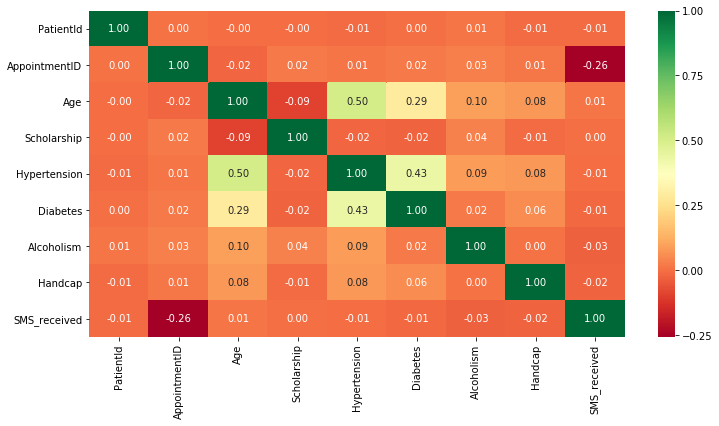

In [52]:
# Relationships between the columns
plt.figure(figsize=[12,6])
sns.heatmap(df_new.corr(), annot=True, fmt='0.2f', cmap="RdYlGn")

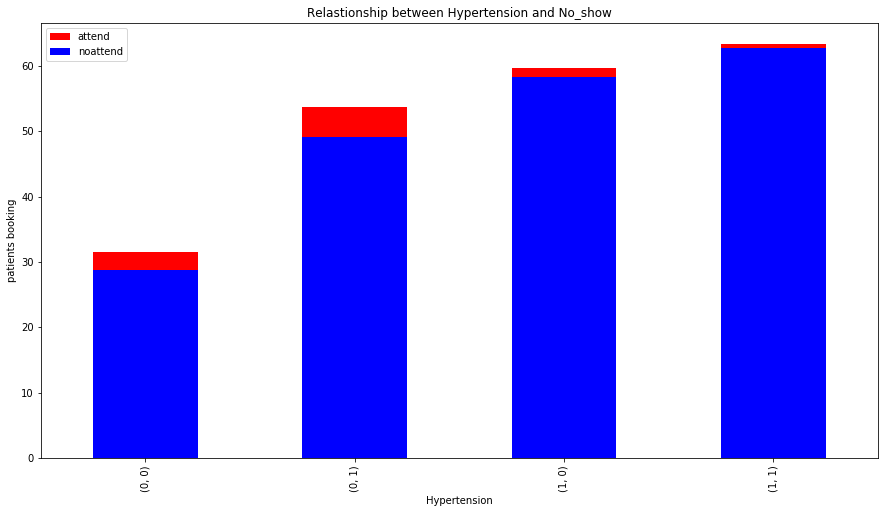

In [69]:
# Relastionship between Age and Hypertension , Diabetes
plt.figure(figsize=[15, 8])
df_new[attend].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind= 'bar', color='red', label = 'attend')
df_new[noattend].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind= 'bar', color='blue', label = 'noattend')
plt.legend(loc='upper left')
plt.xlabel('Hypertension')
plt.ylabel('patients booking')
plt.title('Relastionship between Hypertension and No_show');

In [55]:
# Percentage of patients who had  attended or not and have both (Hypertension, Diabetes) or not

df_new.groupby(['Hypertension','Diabetes'])['No_show'].value_counts(normalize=True).unstack(['Hypertension','Diabetes'])

Hypertension         0                   1          
Diabetes             0         1         0         1
No_show                                             
No            0.790782  0.801647  0.828208  0.824083
Yes           0.209218  0.198353  0.171792  0.175917

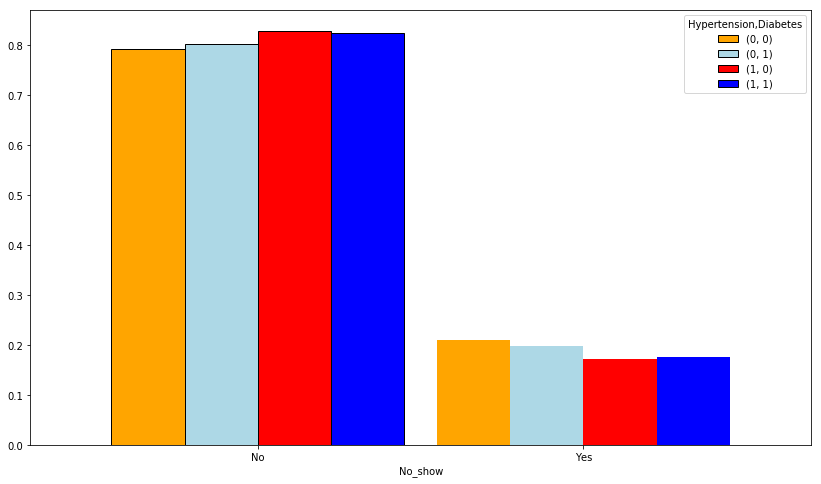

In [66]:
df_new.groupby(['Hypertension','Diabetes'])['No_show'].value_counts(normalize=True).unstack(['Hypertension','Diabetes']).plot.bar(edgecolor='black',
                                                                                            figsize=[14,8],
                                                                                            rot=0,
                                                                                            width=0.9,
                                                                                            color=['orange','lightblue','red','blue']);

The difference between the percentage of non-attendance with patients who have both( Hypertension, Diabetes) and those who have not is small, and therefore both( Hypertension, Diabetes) are not effective in attendance from non-attendance.

<a id='conclusions'></a>
## Conclusions

> ** Some Facts :

        1- Number of booking (110,526).
        2- Number of people who attended (88,207), percentage (79.81%) from total booking.
        3- Number of those who did not attend (22,319),  percentage (20.19%) from total booking.
        4- Percentage of females who did not attend from total females (20.31%)
        5- Percentage of men who did not attend from total men (19.97%)
        6- Percentage of patients who had not Hypertension and not attended from total patients have not Hypertension (20.90%)
        7- Percentage of patients who had Hypertension and not attended from total patients have Hypertension (17.30%)
        8- Percentage of patients who had received SMS and  not attended from total patients had received SMS (27.57%)
        9- Percentage of patients who had not received SMS and  not attended from total patients had not received SMS(16.70%)
       10- Percentage of patients who had not attended and have both (Hypertension, Diabetes) (17.59%)
       11- Percentage of patients who had not attended and have not both (Hypertension, Diabetes) (20.92%)

> ** Some conclusions :  

        1- Most of the non-attendance rates are close to the total percentage of (20.19%) despite the presence of different influences such as Gender, Hypertension, receiving messages and have both (Hypertension, Diabetes).
        2- Patients who received SMS and did not attend are greater than those who did not receive SMS and did not attend. It gives an indication of weak SMS service and does not achieve what is required.
        3- Their are some areas that The patients who attended were high
        4- we need to make study to ensure the proximity of the distance, or perhaps advertising, the good reputation of the service, or other things increasing from attendance Patients from those areas .


In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0